In [1]:
import os
import pandas as pd
import numpy as np
import glob
import datetime
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import csv

In [57]:
with open('data.csv', 'r') as csvfile:
  data = pd.read_csv(csvfile, index_col=0,header=0)
frame = pd.DataFrame(data[1:])
frame

,old_index,Date/Time,Opponent,Point Elapsed Seconds,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,Passer,...,Toward Our Goal Distance,Teamname,Tournament,TID,YID,GID,QID,PID,Side,UID
1,1,2014-04-13 14:12:00,Minnesota Wind Chill,36,O,1,0,Offense,Catch,Bob L,...,NaN,Chicago Wildfire,AUDL 2014,4,2014,1,1,0,NaN,4-2014-01
2,2,2014-04-13 14:12:00,Minnesota Wind Chill,36,O,1,0,Offense,Catch,Ron K,...,NaN,Chicago Wildfire,AUDL 2014,4,2014,1,1,0,NaN,4-2014-01
3,3,2014-04-13 14:12:00,Minnesota Wind Chill,36,O,1,0,Offense,Goal,Aj Nelso,...,NaN,Chicago Wildfire,AUDL 2014,4,2014,1,1,0,NaN,4-2014-01
4,4,2014-04-13 14:12:00,Minnesota Wind Chill,78,D,2,0,Defense,Pull,NaN,...,NaN,Chicago Wildfire,AUDL 2014,4,2014,1,1,1,NaN,4-2014-01
5,5,2014-04-13 14:12:00,Minnesota Wind Chill,78,D,2,0,Defense,D,NaN,...,NaN,Chicago Wildfire,AUDL 2014,4,2014,1,1,1,NaN,4-2014-01
6,6,2014-04-13 14:12:00,Minnesota Wind Chill,78,D,2,0,Offense,Catch,Dan W,...,NaN,Chicago Wildfire,AUDL 2014,4,2014,1,1,1,NaN,4-2014-01
7,7,2014-04-13 14:12:00,Minnesota Wind Chill,78,D,2,0,Offense,Catch,Alex D-W,...,NaN,Chicago Wildfire,AUDL 2014,4,2014,1,1,1,NaN,4-2014-01
8,8,2014-04-13 14:12:00,Minnesota Wind Chill,78,D,2,0,Offense,Catch,Dane O,...,NaN,Chicago Wildfire,AUDL 2014,4,2014,1,1,1,NaN,4-2014-01
9,9,2014-04-13 14:12:00,Minnesota Wind Chill,78,D,2,0,Offense,Catch,Sheehan,...,NaN,Chicago Wildfire,AUDL 2014,4,2014,1,1,1,NaN,4-2014-01
10,10,2014-04-13 14:12:00,Minnesota Wind Chill,78,D,2,0,Offense,Catch,Dane O,...,NaN,Chicago Wildfire,AUDL 2014,4,2014,1,1,1,NaN,4-2014-01


In [136]:
BBB = frame.loc[frame.UID == '14-2018-13', ['Event Type', 'Action','Passer','Receiver', 'Begin Area','Begin X','End X','Begin Y','End Y', 'Side','UID','PID','QID']]
AA = frame.loc[frame.UID == '14-2018-13']

AA[['Event Type', 'Action','Passer','Receiver', 'Begin Area','Begin X','End X','Begin Y','End Y', 'Side','UID','PID','QID']]

,Event Type,Action,Passer,Receiver,Begin Area,Begin X,End X,Begin Y,End Y,Side,UID,PID,QID
553024,Offense,OpponentPull,Anonymous,Anonymous,Endzone B,101.38,23.68,36.882,15.660,B Offense,14-2018-13,1,1
553025,Offense,Catch,Burden,Goderre,Field,22.88,25.76,15.552,27.432,B Offense,14-2018-13,1,1
553026,Offense,Catch,Goderre,Burden,Field,25.76,35.28,27.432,15.552,B Offense,14-2018-13,1,1
553027,Offense,Catch,Burden,Goderre,Field,35.28,30.00,15.552,37.908,B Offense,14-2018-13,1,1
553028,Offense,Catch,Goderre,Cabot,Field,30.00,26.40,37.908,24.084,B Offense,14-2018-13,1,1
553029,Offense,Catch,Cabot,Malik,Field,26.40,39.68,24.084,12.906,B Offense,14-2018-13,1,1
553030,Offense,Catch,Malik,Quentin,Field,39.68,45.60,12.906,27.216,B Offense,14-2018-13,1,1
553031,Offense,Drop,Quentin,Cabot,Field,45.60,32.48,27.216,19.008,B Offense,14-2018-13,1,1
553032,Defense,OpponentCatch,NaN,NaN,Field,32.72,20.88,19.008,29.430,B Offense,14-2018-13,1,1
553033,Defense,OpponentCatch,NaN,NaN,Field,20.88,26.16,29.430,34.344,B Offense,14-2018-13,1,1


In [133]:
B = frame.loc[frame.PID == 0,'UID'].unique()
C = frame['UID'].unique()
print(len(B),len(C), len(C)-len(B))

797 1700 903


In [143]:
AA = frame.loc[frame.UID == '14-2018-13']

AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X']
AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X'] 
AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

AA['End X'] = AA['End X'] - AA['Begin X']
AA['Begin X'] = 0
AA['End Y'] = AA['End Y'] - AA['Begin Y']
AA['Begin Y'] = 0



AA[['Event Type', 'Action','Passer','Receiver', 'Begin Area','Begin X','End X','Begin Y','End Y', 'Side','UID','PID','QID']]





C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

,Event Type,Action,Passer,Receiver,Begin Area,Begin X,End X,Begin Y,End Y,Side,UID,PID,QID
553024,Offense,OpponentPull,Anonymous,Anonymous,Endzone B,0,-77.70,0,-21.222,B Offense,14-2018-13,1,1
553025,Offense,Catch,Burden,Goderre,Field,0,2.88,0,11.880,B Offense,14-2018-13,1,1
553026,Offense,Catch,Goderre,Burden,Field,0,9.52,0,-11.880,B Offense,14-2018-13,1,1
553027,Offense,Catch,Burden,Goderre,Field,0,-5.28,0,22.356,B Offense,14-2018-13,1,1
553028,Offense,Catch,Goderre,Cabot,Field,0,-3.60,0,-13.824,B Offense,14-2018-13,1,1
553029,Offense,Catch,Cabot,Malik,Field,0,13.28,0,-11.178,B Offense,14-2018-13,1,1
553030,Offense,Catch,Malik,Quentin,Field,0,5.92,0,14.310,B Offense,14-2018-13,1,1
553031,Offense,Drop,Quentin,Cabot,Field,0,-13.12,0,-8.208,B Offense,14-2018-13,1,1
553032,Defense,OpponentCatch,NaN,NaN,Field,0,11.84,0,-10.422,B Offense,14-2018-13,1,1
553033,Defense,OpponentCatch,NaN,NaN,Field,0,-5.28,0,-4.914,B Offense,14-2018-13,1,1


In [ ]:
explo = frame.loc[frame.UID == '4-2014-01']
explo

In [ ]:
x1=0
y1=0
y2=0
z1=0
for index,row in AA.iterrows():
    y1 = y2
    x2 = row['Our Score - End of Point']
    z2 = row['Their Score - End of Point']
    y2 = row['Elapsed Time (secs)']
    #print (x1 ,x2, y1, y2, z1, z2)
    plt.plot([y1,y2],[x1,x2], 'b-')
    plt.plot([y1,y2],[z1,z2], 'r-')
    x1=x2
    z1=z2
    

    

plt.show()

In [142]:
# Create a PDF with graph of all point of a game

with PdfPages(r'C:\Users\Max\Desktop\Charts.pdf') as export_pdf:
    plt.close()
    plt.figure(num=None, figsize=(8.5,11 ), dpi=300, facecolor='w', edgecolor='k')
    x = 1
    
    for i in range(AA.PID.max()):
        BB = AA.loc[AA.PID == i+1]
        
        plt.subplot(4,2,x)
        plt.subplots_adjust(hspace=0.5)
        for index,row in BB.iterrows():
            x1 = row['Begin X']
            x2 = row['End X']
            y1 = row['Begin Y']
            y2 = row['End Y']

            if row['Action'] in ["Pull", "PullOb"]:
                plt.plot(x1,y1, 'yo', markersize=3)
                plt.plot([x1,x2],[y1,y2], 'y:' , linewidth=1)
            elif row['Action'] in ["OpponentPull", "OpponentPullOb"]:
                plt.plot(x1,y1, 'go', markersize=3)
                plt.plot([x1,x2],[y1,y2], 'g:', linewidth=1)
            elif row['Event Type'] == 'Offense':
                plt.plot([x1,x2],[y1,y2], 'bo-', linewidth=1, markersize=3)
            else:   
                plt.plot([x1,x2],[y1,y2], 'ro-', linewidth=1, markersize=3)
            if row['Action'] in ["Throwaway", "Drop"]:
                plt.plot(x2,y2, 'yo-', linewidth=1, markersize=3)
            if row['Action'] == 'Goal':
                plt.plot(x2,y2, 'ko-', markersize=5)

        plt.plot([20,20],[0,54], 'k--', linewidth=1)
        plt.plot([100,100],[0,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([0,120,0,54])
        title= row['Teamname'] + " "+ str(row['Our Score - End of Point']) +" - "+ str(row['Their Score - End of Point']) + " " + row['Opponent'] + " (Q"+ str(row['QID']) +" "+ str(row['PID']) +")"  
        plt.title(title, fontsize=10)
        print(title)
        if x == 8:
            export_pdf.savefig()
            plt.close()
            plt.figure(num=None, figsize=(8.5,11 ), dpi=300, facecolor='w', edgecolor='k')
            x=0
        x=x+1
    
    export_pdf.savefig()
    plt.close()
plt.close()    

Montreal Royal 0 - 1 Toronto Rush (Q1 1)
Montreal Royal 0 - 2 Toronto Rush (Q1 2)
Montreal Royal 1 - 2 Toronto Rush (Q1 3)
Montreal Royal 1 - 3 Toronto Rush (Q1 4)
Montreal Royal 2 - 3 Toronto Rush (Q1 5)
Montreal Royal 3 - 3 Toronto Rush (Q1 6)
Montreal Royal 3 - 4 Toronto Rush (Q1 7)
Montreal Royal 4 - 4 Toronto Rush (Q1 8)
Montreal Royal 4 - 5 Toronto Rush (Q1 9)
Montreal Royal 5 - 5 Toronto Rush (Q1 10)
Montreal Royal 5 - 6 Toronto Rush (Q1 11)
Montreal Royal 6 - 6 Toronto Rush (Q1 12)
Montreal Royal 6 - 7 Toronto Rush (Q1 13)
Montreal Royal 7 - 7 Toronto Rush (Q1 14)
Montreal Royal 7 - 8 Toronto Rush (Q1 15)
Montreal Royal 8 - 8 Toronto Rush (Q2 16)
Montreal Royal 9 - 8 Toronto Rush (Q2 17)
Montreal Royal 9 - 9 Toronto Rush (Q2 18)
Montreal Royal 9 - 10 Toronto Rush (Q2 19)
Montreal Royal 10 - 10 Toronto Rush (Q2 20)
Montreal Royal 11 - 10 Toronto Rush (Q2 21)
Montreal Royal 12 - 10 Toronto Rush (Q2 22)
Montreal Royal 12 - 11 Toronto Rush (Q2 23)
Montreal Royal 12 - 12 Toronto Rus

In [304]:
#HEATMAP PASSE DEPUIS ZERO

import seaborn as sns

with PdfPages(r'C:\Users\Max\Desktop\Charts.pdf') as export_pdf:
    plt.close()
    plt.figure(num=None, figsize=(8.5,11 ), dpi=300, facecolor='w', edgecolor='k')

    AA = frame.loc[(frame.TID==14)&(frame.YID == 2018)]
    AA = AA.dropna(subset=['Begin X'])
    
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X'] 
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

    AA['End X'] = AA['End X'] - AA['Begin X']
    AA['Begin X'] = 0
    AA['End Y'] = AA['End Y'] - AA['Begin Y']
    AA['Begin Y'] = 0
    
    
    passer = sorted(AA.loc[AA['Event Type']== 'Offense','Passer'].unique())
    passer.remove('Anonymous')
    passer.remove('Massi')
    passer.remove('Krump')
    print(passer)
    
    
    

    for i in passer:
        BB = AA.loc[AA.Passer == i, ['Event Type', 'Action', 'Passer','Begin X','End X','Begin Y','End Y']]
        
        x1 = BB['End X']
        y1 = BB['End Y']
        
        ax1 = plt.subplot(4,2,x)
        plt.subplots_adjust(hspace=0.5)
        
        for index,row in BB.iterrows():
            
            x2 = row['End X']
            y2 = row['End Y']
            
     
            if row['Action'] == 'Throwaway':
                plt.plot(x2,y2, 'ro', markersize=2)
            elif row['Action'] == 'Goal':
                plt.plot(x2,y2, 'bo', markersize=2)
            else:
                plt.plot(x2,y2, 'yo', markersize=2)
        
        plt.plot([-120,120],[0,0], 'k--', linewidth=1)
        plt.plot([0,0],[-54,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([-50,120,-54,54])
        title= row['Passer']
        plt.title(title, loc='left', fontsize=12)
        print(title)
        
        x+=1
        
        ax2 = plt.subplot(4,2,x)
        plt.subplots_adjust(hspace=0.5)
        
        sns.kdeplot(x1,y1, cmap="Blues", bw=3.5, shade=True, shade_lowest=False)
        plt.plot([-120,120],[0,0], 'k--', linewidth=1)
        plt.plot([0,0],[-54,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([-50,120,-54,54])

        
        if x == 8:
            export_pdf.savefig()
            plt.close()
            plt.figure(num=None, figsize=(8.5,11 ), dpi=300, facecolor='w', edgecolor='k')
            x=0
        x=x+1

    export_pdf.savefig()
    plt.close()
plt.close()    

['Andre', 'Big Mike', 'Bisson', 'Breton', 'Burden', 'Cabot', 'Ceballos', 'Chaouch', 'Charette', 'Faber', 'Gamache', 'Genest', 'Goderre', 'Groulx', 'Hibbert', 'Jean G', 'Joncas', 'Lemieux', 'Malik', 'Monfette', 'Nas', 'Quentin', 'Quinlan', 'Saunders', 'Steve', 'Vallee']
Andre
Big Mike
Bisson
Breton
Burden
Cabot
Ceballos
Chaouch
Charette
Faber
Gamache
Genest
Goderre
Groulx
Hibbert
Jean G
Joncas
Lemieux
Malik
Monfette
Nas
Quentin
Quinlan
Saunders
Steve
Vallee


In [325]:
#HEATMAP PASSE DEPUIS ZERO

import seaborn as sns

with PdfPages(r'C:\Users\Max\Desktop\Charts.pdf') as export_pdf:
    plt.close()
    plt.figure(num=None, figsize=(8.5,11 ), dpi=300, facecolor='w', edgecolor='k')
    x = 1
    AA = frame.loc[(frame.TID==14)&(frame.YID == 2018)]
    AA = AA.dropna(subset=['Begin X'])
    
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X'] 
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

    
    passer = sorted(AA.loc[AA['Event Type']== 'Offense','Passer'].unique())
    passer.remove('Anonymous')
    passer.remove('Massi')
    passer.remove('Krump')
    print(passer)
    
    
    

    BB = AA.loc[(AA['Event Type'] == 'Defense'), ['Event Type', 'Action', 'Passer','Begin X','End X','Begin Y','End Y']]
    
    ax1 = plt.subplot(2,1,1)
    plt.subplots_adjust(hspace=0.5)
        
    for index, row in BB.iterrows():
        x2 = row['End X']
        y2 = row['End Y']
            
     
        if row['Action'] == 'Throwaway':
            plt.plot(x2,y2, 'ro', markersize=2)
        elif row['Action'] == 'Goal':
            plt.plot(x2,y2, 'bo', markersize=2)
        else:
            plt.plot(x2,y2, 'yo', markersize=2)
        
    plt.plot([20,20],[0,54], 'k--', linewidth=1)
    plt.plot([100,100],[0,54], 'k--', linewidth=1)
    ax = plt.gca()
    ax.axis([0,120,0,54])
            
      
    ax2 = plt.subplot(2,1,2)
    plt.subplots_adjust(hspace=0.5)
        
    sns.kdeplot(BB['End X'],BB['End Y'], cmap="Blues", bw=3, shade=True,legend=None, shade_lowest=False)
    plt.plot([20,20],[0,54], 'k--', linewidth=1)
    plt.plot([100,100],[0,54], 'k--', linewidth=1)
    ax = plt.gca()
    ax.axis([0,120,0,54])      


    export_pdf.savefig()
    plt.close()
plt.close()    
    

['Andre', 'Big Mike', 'Bisson', 'Breton', 'Burden', 'Cabot', 'Ceballos', 'Chaouch', 'Charette', 'Faber', 'Gamache', 'Genest', 'Goderre', 'Groulx', 'Hibbert', 'Jean G', 'Joncas', 'Lemieux', 'Malik', 'Monfette', 'Nas', 'Quentin', 'Quinlan', 'Saunders', 'Steve', 'Vallee']


In [ ]:
    
    x1 = BB['End X']
    y1 = BB['End Y']
        
    ax1 = plt.subplot(4,2,x)
    plt.subplots_adjust(hspace=0.5)
        
    for index,row in BB.iterrows():
            
            x2 = row['End X']
            y2 = row['End Y']
            
     
            if row['Action'] == 'Throwaway':
                plt.plot(x2,y2, 'ro', markersize=2)
            elif row['Action'] == 'Goal':
                plt.plot(x2,y2, 'bo', markersize=2)
            else:
                plt.plot(x2,y2, 'yo', markersize=2)
        
        plt.plot([-120,120],[0,0], 'k--', linewidth=1)
        plt.plot([0,0],[-54,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([-50,120,-54,54])
        title= row['Passer']
        plt.title(title, loc='left', fontsize=12)
        print(title)
        
        x+=1
        
        ax2 = plt.subplot(4,2,x)
        plt.subplots_adjust(hspace=0.5)
        
        sns.kdeplot(x1,y1, cmap="Blues", bw=3.5, shade=True, shade_lowest=False)
        plt.plot([-120,120],[0,0], 'k--', linewidth=1)
        plt.plot([0,0],[-54,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([-50,120,-54,54])

        
        if x == 8:
            export_pdf.savefig()
            plt.close()
            plt.figure(num=None, figsize=(8.5,11 ), dpi=300, facecolor='w', edgecolor='k')
            x=0
        x=x+1

    export_pdf.savefig()
    plt.close()
plt.close()    

In [347]:
#FULL OFFENSE ANALYSIS 


import seaborn as sns

with PdfPages(r'C:\Users\Max\Desktop\Charts.pdf') as export_pdf:
    plt.close()
    
    year = 2018
    
    AA = frame.loc[(frame.TID==14)&(frame.YID == year)]
    AA = AA.dropna(subset=['Begin X'])
    
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X'] 
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

  
    receiver = sorted(AA.loc[AA['Event Type']== 'Offense','Receiver'].unique())
    receiver.remove('Anonymous')
    receiver.remove('Massi')
    receiver.remove('Krump')
    receiver.remove('Faber')
    receiver.remove('Chaouch')
    print(receiver)
    
     

    for i in receiver:
        BB = AA.loc[AA.Receiver == i, ['Event Type', 'Action', 'Passer','Receiver','Begin X','End X','Begin Y','End Y']]
        CC = AA.loc[AA.Passer == i, ['Event Type', 'Action', 'Passer','Receiver','Begin X','End X','Begin Y','End Y']]
        
        plt.figure(num=None, figsize=(8.5,11 ), dpi=300, facecolor='w', edgecolor='k')
        
        
        # RECEPTIONS
        plt.subplot2grid((4,2),(0,0))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(i +' - AUDL '+ str(year), ha='left', va='bottom', x=0.10, y =0.93, fontsize=16)
        
        for index,row in BB.iterrows():
            
            x2 = row['End X']
            y2 = row['End Y']
            
     
            if row['Action'] == 'Drop':
                plt.plot(x2,y2, 'ro', markersize=2)
            elif row['Action'] == 'Goal':
                plt.plot(x2,y2, 'bo', markersize=2)
            else:
                plt.plot(x2,y2, 'yo', markersize=2)
        
        plt.plot([20,20],[0,54], 'k--', linewidth=1)
        plt.plot([100,100],[0,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([0,120,0,54])
        
        plt.title('Reception', loc='left', fontsize=12)
        
        x+=1
        
        
        # PASSES
        plt.subplot2grid((4,2),(0,1))
        plt.subplots_adjust(hspace=0.5)
        
        for index,row in CC.iterrows():
            
            x2 = row['Begin X']
            y2 = row['Begin Y']
                   
            if row['Action'] == 'Throwaway':
                plt.plot(x2,y2, 'ro', markersize=2)
            elif row['Action'] == 'Goal':
                plt.plot(x2,y2, 'bo', markersize=2)
            else:
                plt.plot(x2,y2, 'yo', markersize=2)
        
        plt.plot([20,20],[0,54], 'k--', linewidth=1)
        plt.plot([100,100],[0,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([0,120,0,54])
        
        plt.title('Passes', loc='left', fontsize=12)
        
             
        #K RECEPTION
        plt.subplot2grid((4,2),(1,0), colspan=2, rowspan=2)
        plt.subplots_adjust(hspace=0.5)
        
        sns.kdeplot(BB['End X'],BB['End Y'], cmap="Blues", bw=3.7, shade=True, shade_lowest=False,legend=None)
        plt.plot([20,20],[0,54], 'k--', linewidth=1)
        plt.plot([100,100],[0,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([0,120,0,54])
        plt.title('Offense Heatmap', loc='left', fontsize=12)


        #PASSES SELON ZERO
        CC['End X'] = CC['End X'] - CC['Begin X']
        CC['End Y'] = CC['End Y'] - CC['Begin Y']

     
        plt.subplot2grid((4,2),(3,0))
        plt.subplots_adjust(hspace=0.5)
        
        for index,row in CC.iterrows():
            
            x2 = row['End X']
            y2 = row['End Y']
            
     
            if row['Action'] == 'Throwaway':
                plt.plot(x2,y2, 'ro', markersize=2)
            elif row['Action'] == 'Goal':
                plt.plot(x2,y2, 'bo', markersize=2)
            else:
                plt.plot(x2,y2, 'yo', markersize=2)
        
        plt.plot([-120,120],[0,0], 'k--', linewidth=1)
        plt.plot([0,0],[-54,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([-25,80,-54,54])
        plt.title('Passe - Normalisé', loc='left', fontsize=12)

        
        #K - PASSES SELON ZERO
        plt.subplot2grid((4,2),(3,1))
        plt.subplots_adjust(hspace=0.5)
        
        sns.kdeplot(CC['End X'],CC['End Y'], cmap="Blues", bw=5, shade=True, shade_lowest=False, legend=None)
        plt.plot([-120,120],[0,0], 'k--', linewidth=1)
        plt.plot([0,0],[-54,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([-25,80,-54,54])

        
        print(i)
        
        export_pdf.savefig()
        plt.close()
    export_pdf.savefig()
    plt.close()
plt.close()    

['Andre', 'Big Mike', 'Bisson', 'Breton', 'Burden', 'Cabot', 'Ceballos', 'Charette', 'Gamache', 'Genest', 'Goderre', 'Groulx', 'Hibbert', 'Jean G', 'Joncas', 'Lemieux', 'Malik', 'Monfette', 'Nas', 'Quentin', 'Quinlan', 'Saunders', 'Steve', 'Vallee']
Andre
Big Mike
Bisson
Breton
Burden
Cabot
Ceballos
Charette
Gamache
Genest
Goderre
Groulx
Hibbert
Jean G
Joncas
Lemieux
Malik
Monfette
Nas
Quentin
Quinlan
Saunders
Steve
Vallee


ValueError: No figure None

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: Matplotlib

KeyError: 0

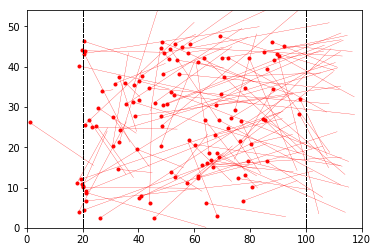

In [343]:
year = 2018

AA = frame.loc[(frame.TID==14)&(frame.YID == year)]
AA = AA.dropna(subset=['Begin X'])

AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X']
AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X'] 
AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

for i in receiver:
    CC = AA.loc[(AA.Passer == i)&(AA.Action == 'Throwaway'), ['Event Type', 'Action', 'Passer','Receiver','Begin X','End X','Begin Y','End Y']]
    
    
    plt.subplot()
    plt.subplots_adjust(hspace=0.5)
    plt.plot([CC['Begin X'],CC['End X']],[CC['Begin Y'],CC['End Y']], 'ro-', linewidth=0.25, markersize=3, markevery=3)
    plt.plot([20,20],[0,54], 'k--', linewidth=1)
    plt.plot([100,100],[0,54], 'k--', linewidth=1)
    ax = plt.gca()
    ax.axis([0,120,0,54])


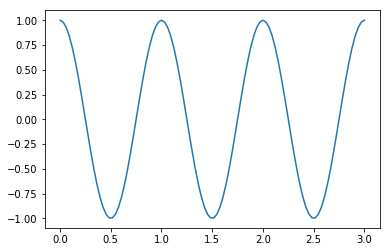

In [139]:
# spécific point inspection

AA.loc[AA['PID']==34]

,old_index,Date/Time,Opponent,Point Elapsed Seconds,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,Passer,...,Toward Our Goal Distance,Teamname,Tournament,TID,YID,GID,QID,PID,Side,UID
553417,6563,2018-07-07 18:15:00,Toronto Rush,16,D,17,16,Defense,Pull,NaN,...,91.7,Montreal Royal,AUDL 2018,14,2018,13,3,34,B Defense,14-2018-13
553418,6564,2018-07-07 18:15:00,Toronto Rush,16,D,17,16,Defense,OpponentCatch,NaN,...,-6.6,Montreal Royal,AUDL 2018,14,2018,13,3,34,B Defense,14-2018-13
553419,6565,2018-07-07 18:15:00,Toronto Rush,16,D,17,16,Defense,OpponentCatch,NaN,...,-14.3,Montreal Royal,AUDL 2018,14,2018,13,3,34,B Defense,14-2018-13
553420,6566,2018-07-07 18:15:00,Toronto Rush,16,D,17,16,Defense,Goal,NaN,...,-77.9,Montreal Royal,AUDL 2018,14,2018,13,3,34,B Defense,14-2018-13


In [256]:
import seaborn as sns

with PdfPages(r'C:\Users\Max\Desktop\Charts.pdf') as export_pdf:
    plt.close()
    plt.figure(num=None, figsize=(8.5,11 ), dpi=300, facecolor='w', edgecolor='k')
    x = 1
    AA = frame.loc[(frame.TID==14)&(frame.YID == 2018)]
    AA = AA.dropna(subset=['Begin X'])
    
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X'] 
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

  
    receiver = sorted(AA.loc[AA['Event Type']== 'Offense','Receiver'].unique())
    receiver.remove('Anonymous')
    receiver.remove('Massi')
    receiver.remove('Krump')
    receiver.remove('Faber')
    receiver.remove('Chaouch')
    print(receiver)
    
     

    for i in receiver:
        BB = AA.loc[AA.Receiver == i, ['Event Type', 'Action', 'Passer','Receiver','Begin X','End X','Begin Y','End Y']]
        CC = AA.loc[AA.Passer == i, ['Event Type', 'Action', 'Passer','Receiver','Begin X','End X','Begin Y','End Y']]

        ax1 = []
        ay1 = []
        ax2 = []
        ay2 = []
        
        plt.subplot(4,2,x)
        plt.subplots_adjust(hspace=0.5)
        
        for index,row in BB.iterrows():
            
            x2 = row['End X']
            y2 = row['End Y']
            
     
            if row['Action'] == 'Drop':
                plt.plot(x2,y2, 'ro', markersize=2)
            elif row['Action'] == 'Goal':
                plt.plot(x2,y2, 'bo', markersize=2)
            else:
                plt.plot(x2,y2, 'yo', markersize=2)
        
        plt.plot([20,20],[0,54], 'k--', linewidth=1)
        plt.plot([100,100],[0,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([0,120,0,54])
        
        plt.title(i + ' Rec', loc='left', fontsize=12)
        
        x+=1
        
        plt.subplot(4,2,x)
        plt.subplots_adjust(hspace=0.5)
        
        for index,row in CC.iterrows():
            
            x2 = row['Begin X']
            y2 = row['Begin Y']
                   
            if row['Action'] == 'Throwaway':
                plt.plot(x2,y2, 'ro', markersize=2)
            elif row['Action'] == 'Goal':
                plt.plot(x2,y2, 'bo', markersize=2)
            else:
                plt.plot(x2,y2, 'yo', markersize=2)
        
        plt.plot([20,20],[0,54], 'k--', linewidth=1)
        plt.plot([100,100],[0,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([0,120,0,54])
        
        plt.title(i + ' Pass', loc='left', fontsize=12)
        
        x+=1
        
        plt.subplot(4,2,x)
        plt.subplots_adjust(hspace=0.5)
        
        sns.kdeplot(BB['End X'],BB['End Y'], cmap="Blues", bw=4.5, shade=True, shade_lowest=False)
        plt.plot([0,120],[0,0], 'k--', linewidth=1)
        plt.plot([0,0],[-54,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([0,120,0,54])
        x+=1
        plt.subplot(4,2,x)
        plt.subplots_adjust(hspace=0.5)
        
        sns.kdeplot(ax2,ay2, cmap="Blues", bw=4.5, shade=True, shade_lowest=False)
        plt.plot([0,120],[0,0], 'k--', linewidth=1)
        plt.plot([0,0],[-54,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([0,120,0,54])

        
        if x == 8:
            export_pdf.savefig()
            plt.close()
            plt.figure(num=None, figsize=(8.5,11 ), dpi=300, facecolor='w', edgecolor='k')
            x=0
        x=x+1
        
        print (i)

    export_pdf.savefig()
    plt.close()
plt.close()    

['Andre', 'Big Mike', 'Bisson', 'Breton', 'Burden', 'Cabot', 'Ceballos', 'Charette', 'Gamache', 'Genest', 'Goderre', 'Groulx', 'Hibbert', 'Jean G', 'Joncas', 'Lemieux', 'Malik', 'Monfette', 'Nas', 'Quentin', 'Quinlan', 'Saunders', 'Steve', 'Vallee']
Andre
Big Mike
Bisson
Breton
Burden
Cabot
Ceballos
Charette
Gamache
Genest
Goderre
Groulx
Hibbert
Jean G
Joncas
Lemieux
Malik
Monfette
Nas
Quentin
Quinlan
Saunders
Steve
Vallee


['Andre', 'Big Mike', 'Bisson', 'Breton', 'Burden', 'Cabot', 'Ceballos', 'Charette', 'Gamache', 'Genest', 'Goderre', 'Groulx', 'Hibbert', 'Jean G', 'Joncas', 'Lemieux', 'Malik', 'Monfette', 'Nas', 'Quentin', 'Quinlan', 'Saunders', 'Steve', 'Vallee']


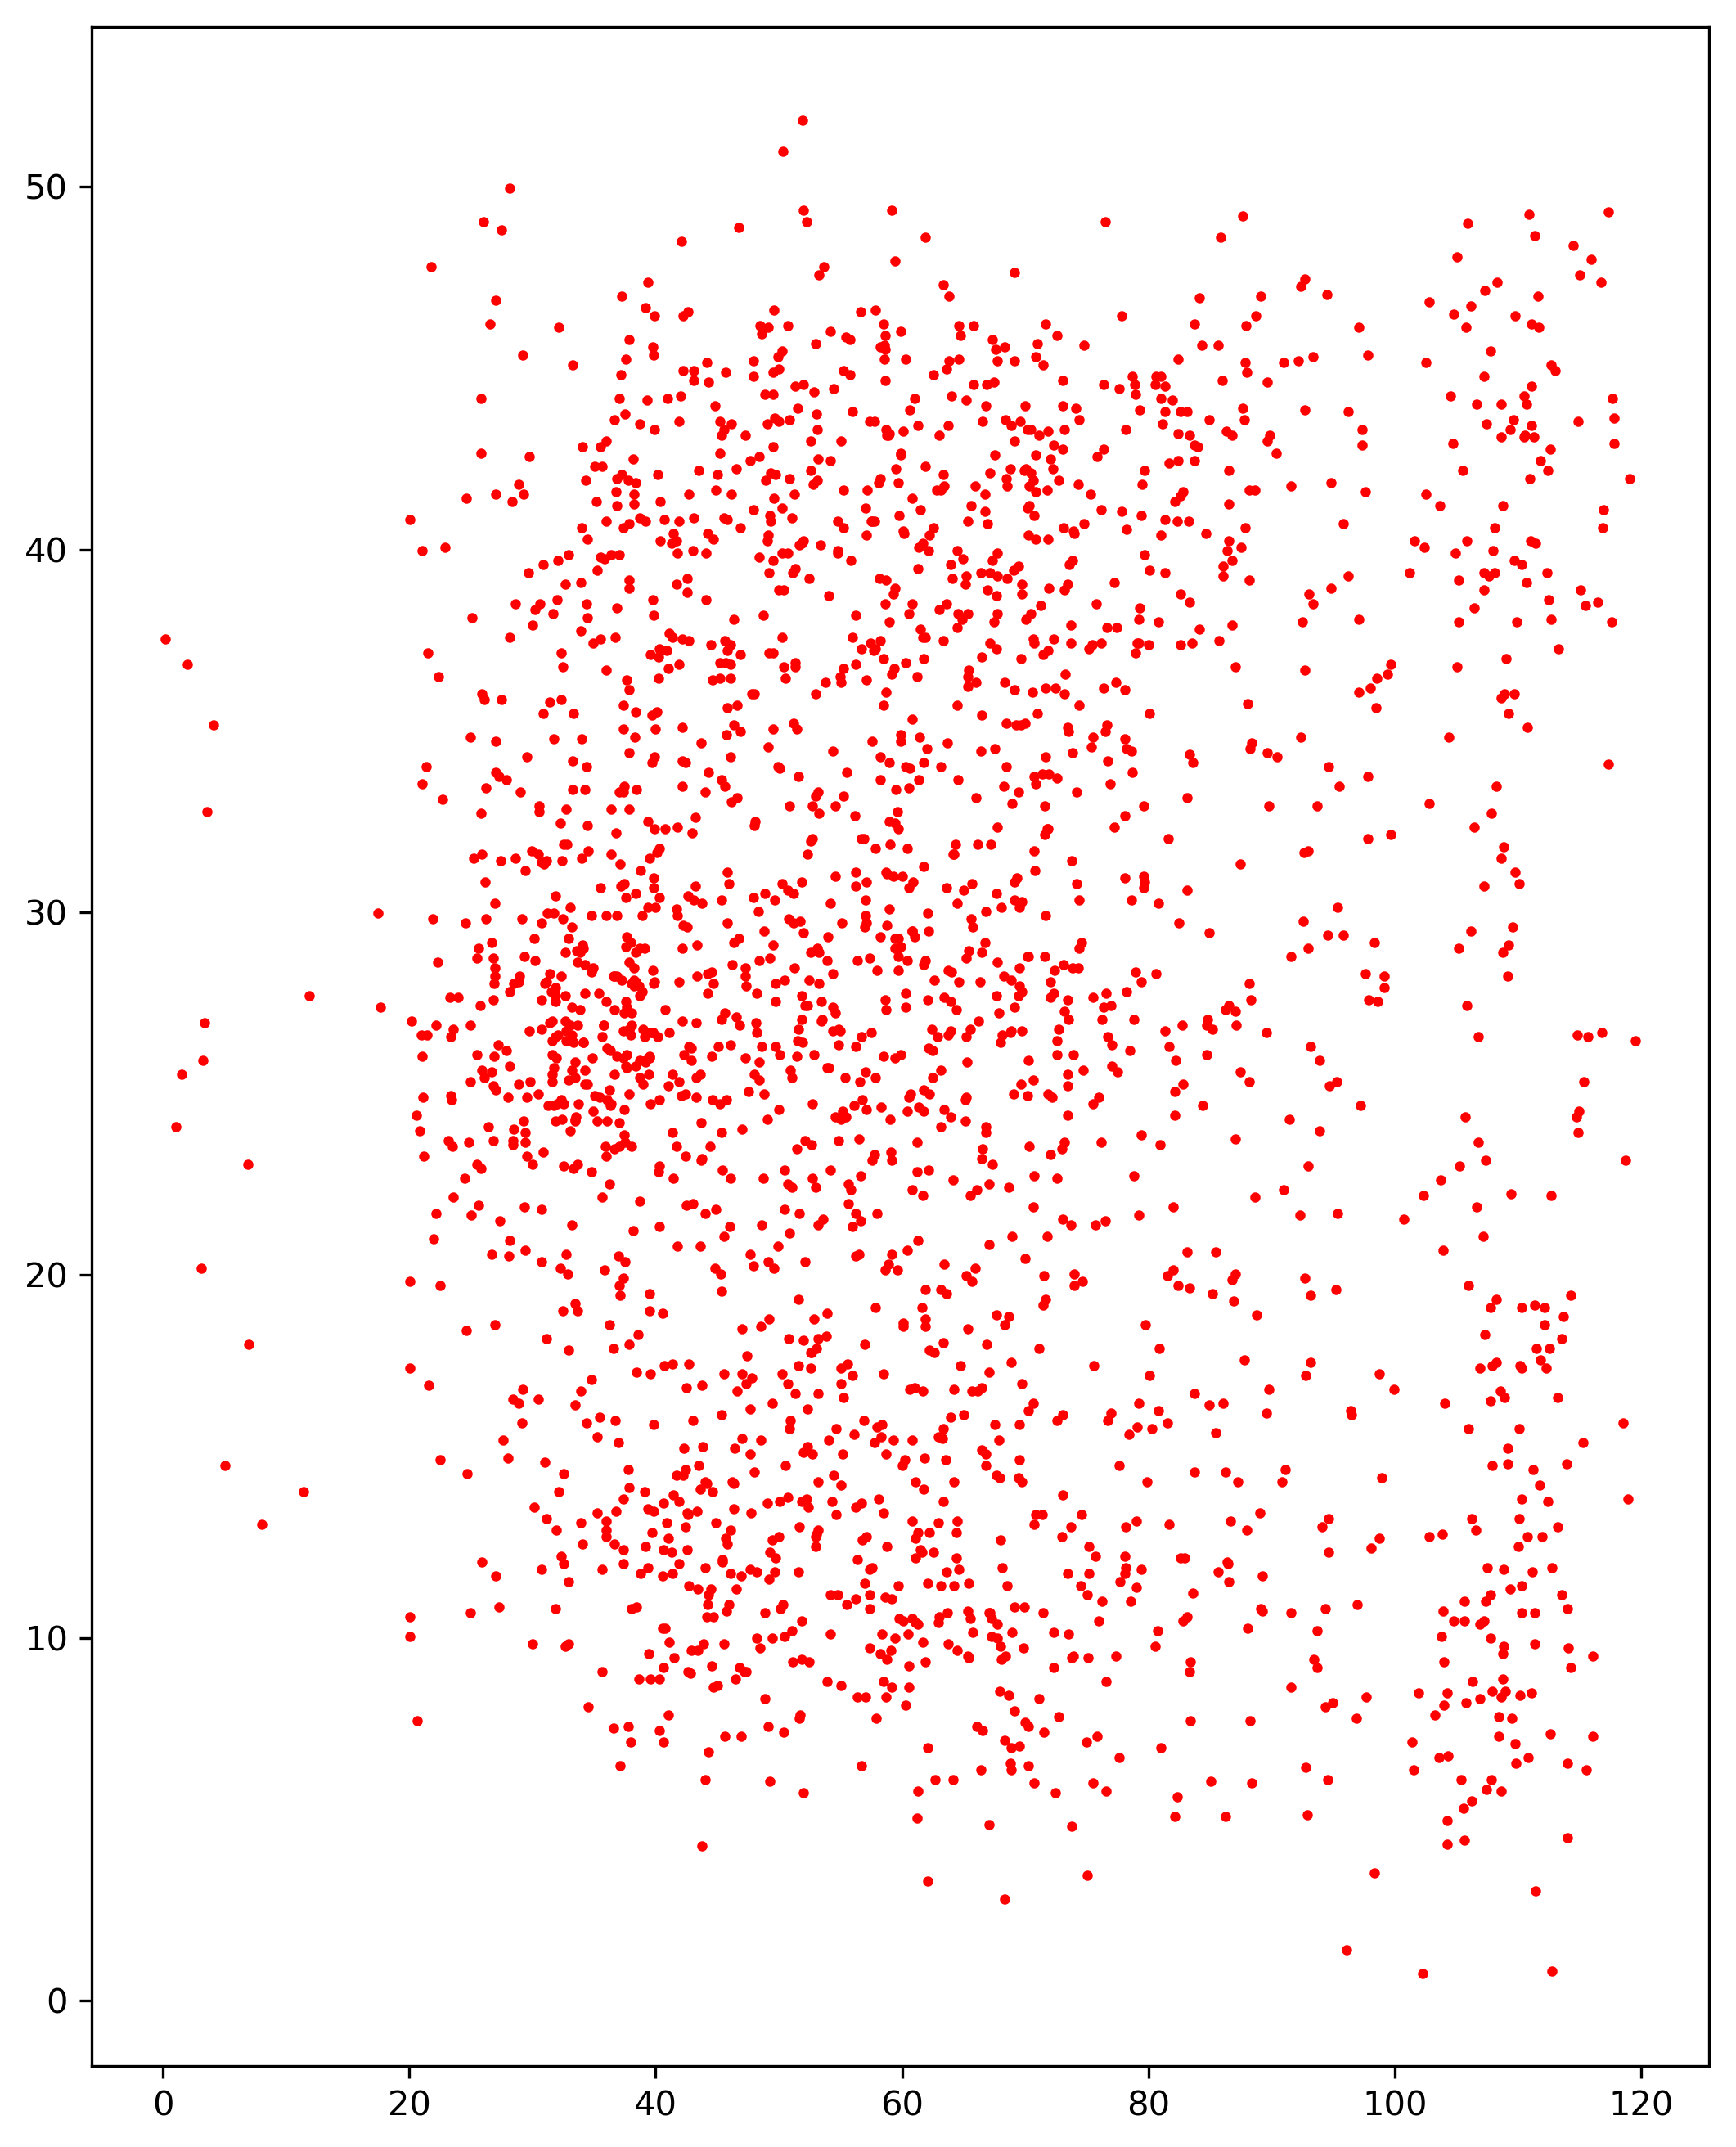

In [254]:
import seaborn as sns

with PdfPages(r'C:\Users\Max\Desktop\Charts.pdf') as export_pdf:
    plt.close()
    plt.figure(num=None, figsize=(8.5,11 ), dpi=300, facecolor='w', edgecolor='k')
    x = 1
    AA = frame.loc[(frame.TID==14)&(frame.YID == 2018)]
    AA = AA.dropna(subset=['Begin X'])
    
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X'] 
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

  
    receiver = sorted(AA.loc[AA['Event Type']== 'Offense','Receiver'].unique())
    receiver.remove('Anonymous')
    receiver.remove('Massi')
    receiver.remove('Krump')
    receiver.remove('Faber')
    receiver.remove('Chaouch')
    print(receiver)
    
     

    for i in receiver:
        BB = AA.loc[AA.Receiver == i, ['Event Type', 'Action', 'Passer','Receiver','Begin X','End X','Begin Y','End Y']]
        CC = AA.loc[AA.Passer == i, ['Event Type', 'Action', 'Passer','Receiver','Begin X','End X','Begin Y','End Y']]

        plt.plot(BB['End X'],BB['End Y'], 'ro', markersize=2)

In [257]:
import seaborn as sns

with PdfPages(r'C:\Users\Max\Desktop\Charts.pdf') as export_pdf:
    plt.close()
    plt.figure(num=None, figsize=(8.5,11 ), dpi=300, facecolor='w', edgecolor='k')
    x = 1
    AA = frame.loc[(frame.TID==14)&(frame.YID == 2018)]
    AA = AA.dropna(subset=['Begin X'])
    
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'A Offense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'A Defense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin X']] = 120 - AA['Begin X'] 
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'B Offense') & (AA['Event Type'] == 'Defense'), ['End Y']] = 54 - AA['End Y']

    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin X']] = 120 - AA['Begin X']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End X']] = 120 - AA['End X']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['Begin Y']] = 54 - AA['Begin Y']
    AA.loc[(AA.Side == 'B Defense') & (AA['Event Type'] == 'Offense'), ['End Y']] = 54 - AA['End Y']

  
    receiver = sorted(AA.loc[AA['Event Type']== 'Offense','Receiver'].unique())
    receiver.remove('Anonymous')
    receiver.remove('Massi')
    receiver.remove('Krump')
    receiver.remove('Faber')
    print(receiver)
    
     

    for i in receiver:
        BB = AA.loc[AA.Receiver == i, ['Event Type', 'Action', 'Receiver','Begin X','End X','Begin Y','End Y']]
        
        x1 = []
        y1 = []
        
        ax1 = plt.subplot(4,2,x)
        plt.subplots_adjust(hspace=0.5)
        
        for index,row in BB.iterrows():
            
            x2 = row['End X']
            y2 = row['End Y']
            
            x1.append(x2)
            y1.append(y2)
       
            if row['Action'] == 'Drop':
                plt.plot(x2,y2, 'ro', markersize=2)
            elif row['Action'] == 'Goal':
                plt.plot(x2,y2, 'bo', markersize=2)
            else:
                plt.plot(x2,y2, 'yo', markersize=2)
        
        plt.plot([20,20],[0,54], 'k--', linewidth=1)
        plt.plot([100,100],[0,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([0,120,0,54])
        
        plt.title(i, loc='left', fontsize=12)
        
        
        x+=1
        
        ax2 = plt.subplot(4,2,x)
        plt.subplots_adjust(hspace=0.5)
        
        sns.kdeplot(x1,y1, cmap="Blues", bw=4.5, shade=True, shade_lowest=False)
        plt.plot([0,120],[0,0], 'k--', linewidth=1)
        plt.plot([0,0],[-54,54], 'k--', linewidth=1)
        ax = plt.gca()
        ax.axis([0,120,0,54])

        
        if x == 8:
            export_pdf.savefig()
            plt.close()
            plt.figure(num=None, figsize=(8.5,11 ), dpi=300, facecolor='w', edgecolor='k')
            x=0
        x=x+1
        
        print (i)


    export_pdf.savefig()
    plt.close()
plt.close()    

['Andre', 'Big Mike', 'Bisson', 'Breton', 'Burden', 'Cabot', 'Ceballos', 'Chaouch', 'Charette', 'Gamache', 'Genest', 'Goderre', 'Groulx', 'Hibbert', 'Jean G', 'Joncas', 'Lemieux', 'Malik', 'Monfette', 'Nas', 'Quentin', 'Quinlan', 'Saunders', 'Steve', 'Vallee']
Andre
Big Mike
Bisson
Breton
Burden
Cabot
Ceballos
Chaouch
Charette
Gamache
Genest
Goderre
Groulx
Hibbert
Jean G
Joncas
Lemieux
Malik
Monfette
Nas
Quentin
Quinlan
Saunders
Steve
Vallee
